# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# importing data
path=(r"C:\Users\Sam\Desktop\CF\Project 4 Instacart Basket\Instacart Basket Analysis\02 Data\Prepared Data")
df_ords_prods_merge=pd.read_pickle(os.path.join(path,"ords_prods_merge_revised.pkl"))

In [3]:
# limiting frame to mln rows
df=df_ords_prods_merge[:1000000]

In [4]:
# checking shape
df.shape

(1000000, 19)

In [5]:
# checking columns
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range,Regular Busy,Regular days,Most orders
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range,Regular Busy,Regular days,Average orders
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,both,Mid-range,Least Busy,Busiest days,Average orders
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,13,NaN,10,0,both,Mid-range,Regular Busy,Slowest days,Most orders
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,both,Mid-range,Busiest Day,Slowest days,Average orders


# Grouping

In [6]:
df.groupby("product_name")

In [7]:
# aggregating
df.groupby("department_id").agg({"order_number":["mean"]})

,order_number
,mean
department_id,
1,15.577493
2,17.320781
3,16.084944
4,17.530458
5,14.763075
6,16.658449
7,17.031590
8,15.076662


In [8]:
# w/o using the agg function
df.groupby("department_id")["order_number"].mean()

department_id
1     15.577493
2     17.320781
3     16.084944
4     17.530458
5     14.763075
6     16.658449
7     17.031590
8     15.076662
9     15.447580
10    18.681852
11    15.447411
12    14.327957
13    16.548642
14    16.960241
15    16.121948
16    17.803851
17    15.593633
18    19.674252
19    16.899756
20    16.255442
21    25.535479
Name: order_number, dtype: float64

In [9]:
# mulitple aggregations
df.groupby("department_id").agg({"order_number":["mean","max","min"]})

order_number        
                      mean max min
department_id                     
1                15.577493  99   1
2                17.320781  96   1
3                16.084944  99   1
4                17.530458  99   1
5                14.763075  99   1
6                16.658449  99   1
7                17.031590  99   1
8                15.076662  98   1
9                15.447580  99   1
10               18.681852  99   1
11               15.447411  99   1
12               14.327957  99   1
13               16.548642  99   1
14               16.960241  99   1
15               16.121948  99   1
16               17.803851  99   1
17               15.593633  99   1
18               19.674252  99   1
19               16.899756  99   1
20               16.255442  99   1
21               25.535479  98   1

In [10]:
# transform() function
df_ords_prods_merge["max_order"]=df_ords_prods_merge.groupby(["user_id"])["order_number"].transform(np.max)

C:\Users\Sam\AppData\Local\Temp\ipykernel_20960\1802975222.py:2: FutureWarning: The provided callable <function amax at 0x0000029568C8EE80> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_ords_prods_merge["max_order"]=df_ords_prods_merge.groupby(["user_id"])["order_number"].transform(np.max)


In [11]:
df_ords_prods_merge.head(15)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range,Regular Busy,Regular days,Most orders,32
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range,Regular Busy,Regular days,Average orders,32
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,both,Mid-range,Least Busy,Busiest days,Average orders,5
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,13,NaN,10,0,both,Mid-range,Regular Busy,Slowest days,Most orders,3
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,both,Mid-range,Busiest Day,Slowest days,Average orders,3
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,both,Mid-range,Regular Busy,Busiest days,Average orders,26
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,14,30.0,2,0,both,Mid-range,Regular Busy,Regular days,Most orders,9
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,10,30.0,1,0,both,Mid-range,Regular Busy,Slowest days,Most orders,12
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,20,19.0,1,0,both,Mid-range,Regular Busy,Busiest days,Average orders,20
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,prior,15,1,12,15.0,2,1,both,Mid-range,Regular Busy,Busiest days,Most orders,20


In [12]:
df_ords_prods_merge.head(100)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range,Regular Busy,Regular days,Most orders,32
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range,Regular Busy,Regular days,Average orders,32
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,both,Mid-range,Least Busy,Busiest days,Average orders,5
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,13,NaN,10,0,both,Mid-range,Regular Busy,Slowest days,Most orders,3
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,both,Mid-range,Busiest Day,Slowest days,Average orders,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Chocolate Sandwich Cookies,61,19,5.8,602103,10831,prior,8,3,11,23.0,5,0,both,Mid-range,Regular Busy,Slowest days,Most orders,10
96,1,Chocolate Sandwich Cookies,61,19,5.8,49629,11119,prior,18,1,14,30.0,1,0,both,Mid-range,Regular Busy,Busiest days,Most orders,23
97,1,Chocolate Sandwich Cookies,61,19,5.8,317888,11186,prior,13,5,16,2.0,8,0,both,Mid-range,Regular Busy,Regular days,Most orders,26
98,1,Chocolate Sandwich Cookies,61,19,5.8,682486,11243,prior,16,3,13,0.0,2,0,both,Mid-range,Regular Busy,Slowest days,Most orders,43


In [13]:
# removing the row limit
pd.options.display.max_rows=101

In [14]:
df_ords_prods_merge.head(100)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both,Mid-range,Regular Busy,Regular days,Most orders,32
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both,Mid-range,Regular Busy,Regular days,Average orders,32
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,both,Mid-range,Least Busy,Busiest days,Average orders,5
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,13,NaN,10,0,both,Mid-range,Regular Busy,Slowest days,Most orders,3
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,both,Mid-range,Busiest Day,Slowest days,Average orders,3
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,both,Mid-range,Regular Busy,Busiest days,Average orders,26
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,14,30.0,2,0,both,Mid-range,Regular Busy,Regular days,Most orders,9
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,10,30.0,1,0,both,Mid-range,Regular Busy,Slowest days,Most orders,12
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,20,19.0,1,0,both,Mid-range,Regular Busy,Busiest days,Average orders,20
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,prior,15,1,12,15.0,2,1,both,Mid-range,Regular Busy,Busiest days,Most orders,20


## setting the flag

In [15]:
df_ords_prods_merge.loc[df_ords_prods_merge["max_order"]>40,"loyalty_flag"]="Loyal customer"
df_ords_prods_merge.loc[(df_ords_prods_merge["max_order"]<=40)&(df_ords_prods_merge["max_order"]>10),"loyalty_flag"]="Regular customer"
df_ords_prods_merge.loc[df_ords_prods_merge["max_order"]<=10,"loyalty_flag"]="New customer"

In [16]:
#checking just "loyalty_flag" cloumn
df_ords_prods_merge["loyalty_flag"].value_counts(dropna=False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [17]:
# checking in the columns
df_ords_prods_merge.head(3)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,3.0,5,0,both,Mid-range,Regular Busy,Regular days,Most orders,32,Regular customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,20.0,1,1,both,Mid-range,Regular Busy,Regular days,Average orders,32,Regular customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,6.0,20,0,both,Mid-range,Least Busy,Busiest days,Average orders,5,New customer


In [18]:
# checking several column head
df_ords_prods_merge[["user_id","loyalty_flag","order_number"]].head(60)

,user_id,loyalty_flag,order_number
0,138,Regular customer,28
1,138,Regular customer,30
2,709,New customer,2
3,764,New customer,1
4,764,New customer,3
5,777,Regular customer,16
6,825,New customer,3
7,910,Regular customer,12
8,1052,Regular customer,10
9,1052,Regular customer,15


# TASK

# REVISIONS

<Axes: >

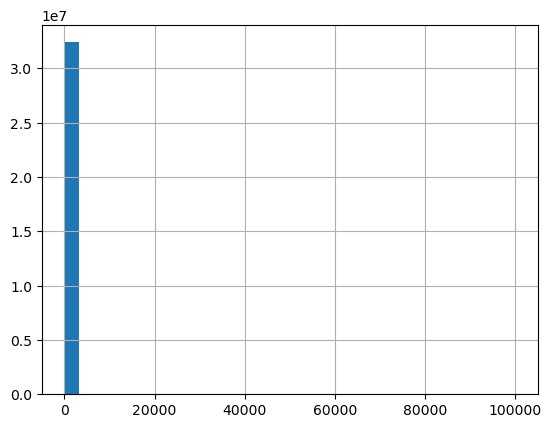

In [34]:
df_ords_prods_merge["prices"].hist(bins=30)

In [38]:
# removing outliers
df_ords_prods_merge.loc[df_ords_prods_merge["prices"]>100,"prices"]=np.nan

## removed outliers and run all code below. The stats changed significantly. Thank you for the feedback

## 3 Analyze the result. How do the results for the entire dataframe differ from those of the subset?

In [39]:
# checking results for the subset to compare
df.groupby("department_id").agg({"order_number":["mean"]})

,order_number
,mean
department_id,
1,15.577493
2,17.320781
3,16.084944
4,17.530458
5,14.763075
6,16.658449
7,17.031590
8,15.076662


The results for the subset limited to the first million rows and the results for the entire dataset seem to not change drasrically, although the changes that seems insignicant can have a big impact depending on what exactly our objective is.

## 4 done in code line 14 and 26

## 5 stats on Loyal Customer, Regular Customer, and New Customer

In [40]:
# determining spending habits of different loyalty groups
df_ords_prods_merge.groupby("loyalty_flag").agg({"prices":["mean"]})

,prices
,mean
loyalty_flag,
Loyal customer,7.773575
New customer,7.801206
Regular customer,7.798262


In [41]:
# including min and max even though know results of 1 and 999 will be produced
df_ords_prods_merge.groupby("loyalty_flag").agg({"prices":["mean","max","min"]})

prices           
                      mean   max  min
loyalty_flag                         
Loyal customer    7.773575  25.0  1.0
New customer      7.801206  25.0  1.0
Regular customer  7.798262  25.0  1.0

The average pricepoint for loyal customers seems to be lower than  for regulars and new customers. This can be caused by the number of transactions that loyal customers have made compare to new ones, bringing down the mean.

## 6 Create a spending flag for each user based on the average price across all their orders using the following criteria:
If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”
If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.

In [42]:
# determining mean price for all users
df_ords_prods_merge["average_price"]=df_ords_prods_merge.groupby(["user_id"])["prices"].transform(np.mean)

C:\Users\Sam\AppData\Local\Temp\ipykernel_20960\1750720136.py:2: FutureWarning: The provided callable <function mean at 0x0000029568C8FBA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_ords_prods_merge["average_price"]=df_ords_prods_merge.groupby(["user_id"])["prices"].transform(np.mean)


In [43]:
# checking the resluts
df_ords_prods_merge[["user_id","average_price"]].head()

,user_id,average_price
0,138,6.935811
1,138,6.935811
2,709,7.930208
3,764,4.972414
4,764,4.972414


In [44]:
# creating a spending flag
df_ords_prods_merge.loc[df_ords_prods_merge["average_price"]>=10,"spending_flag"]="High spender"
df_ords_prods_merge.loc[df_ords_prods_merge["average_price"]<10,"spending_flag"]="Low spender"

In [45]:
# getting "spending_flag" count
df_ords_prods_merge["spending_flag"].value_counts(dropna=False)

spending_flag
Low spender     32285131
High spender      119728
Name: count, dtype: int64

In [46]:
# checking relevant coulmns
df_ords_prods_merge[["user_id","average_price","spending_flag"]]

,user_id,average_price,spending_flag
0,138,6.935811,Low spender
1,138,6.935811,Low spender
2,709,7.930208,Low spender
3,764,4.972414,Low spender
4,764,4.972414,Low spender
...,...,...,...
32404854,200215,8.220313,Low spender
32404855,200377,7.364516,Low spender
32404856,200873,8.500344,Low spender
32404857,200873,8.500344,Low spender


## 7 Create an order frequency flag that marks the regularity of a user’s ordering behavior according to the median in the “days_since_prior_order” column. The criteria for the flag should be as follows:
If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled a “Non-frequent customer.”
If the median is higher than 10 and lower than or equal to 20, then the customer should be labeled a “Regular customer.”
If the median is lower than or equal to 10, then the customer should be labeled a “Frequent customer.”

In [47]:
# determining the median days between orders
df_ords_prods_merge["median_days_between_orders"] = df_ords_prods_merge.groupby(["user_id"])["days_since_prior_order"].transform(np.median)

C:\Users\Sam\AppData\Local\Temp\ipykernel_20960\3820218959.py:2: FutureWarning: The provided callable <function median at 0x0000029568DD4AE0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_ords_prods_merge["median_days_between_orders"] = df_ords_prods_merge.groupby(["user_id"])["days_since_prior_order"].transform(np.median)


In [48]:
# checking for creation
df_ords_prods_merge[["user_id","median_days_between_orders","days_since_prior_order"]]

,user_id,median_days_between_orders,days_since_prior_order
0,138,8.0,3.0
1,138,8.0,20.0
2,709,8.0,6.0
3,764,9.0,NaN
4,764,9.0,9.0
...,...,...,...
32404854,200215,7.0,5.0
32404855,200377,30.0,NaN
32404856,200873,6.0,15.0
32404857,200873,6.0,5.0


In [49]:
# creating frequency flags
df_ords_prods_merge.loc[df_ords_prods_merge["median_days_between_orders"]>20, "order_frequency"]="Non-frequent customer"
df_ords_prods_merge.loc[(df_ords_prods_merge["median_days_between_orders"]<=20) & (df_ords_prods_merge["median_days_between_orders"]>10), "order_frequency"]="Regular customer"
df_ords_prods_merge.loc[df_ords_prods_merge["median_days_between_orders"]<=10, "order_frequency"] = "Frequent customer"

In [50]:
#viewing the coulmn
df_ords_prods_merge["order_frequency"]

0               Frequent customer
1               Frequent customer
2               Frequent customer
3               Frequent customer
4               Frequent customer
                    ...          
32404854        Frequent customer
32404855    Non-frequent customer
32404856        Frequent customer
32404857        Frequent customer
32404858        Frequent customer
Name: order_frequency, Length: 32404859, dtype: object

In [51]:
# checking variable count
df_ords_prods_merge["order_frequency"].value_counts(dropna=False)

order_frequency
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
nan                             5
Name: count, dtype: int64

# Exporting data as pickle

In [52]:
df_ords_prods_merge.to_pickle(os.path.join(path,"ords_prods_merge_revised_grouped.pkl"))